Used for final plots of protocol 1 for the thesis


In [2]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
from Utils import sigma_to_HWHLdegrees
from met_brewer import met_brew
from brokenaxes import brokenaxes
from Utils import *
import seaborn as sns
from sbi import analysis as analysis

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 10})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['savefig.dpi'] = 300

# Set default x and y ticks size
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['axes.labelsize'] = 40
#plt.rcParams['legend.fontsize'] = 12
plt.rcParams["font.family"] = "Times New Roman"

In [4]:
data_name = 'nb_r1_sim_complete'
data_r1 = np.load(f'saved/sim/{data_name}.npz')
theta_r1 = torch.from_numpy(data_r1['theta'])
x_r1 = torch.from_numpy(data_r1['x'])
mask_notnan_r1 = torch.isfinite(x_r1).all(dim=1)
# Select only rows without `inf` values
x_r1 = x_r1[mask_notnan_r1]

data_name = 'P1_r2_data_complete_trainsqrt90'
data_r2 = np.load(f'saved/sim/P1/{data_name}.npz')
theta_r2 = torch.from_numpy(data_r2['theta'])
x_r2 = torch.from_numpy(data_r2['x'])
mask_notnan_r2 = torch.isfinite(x_r2).all(dim=1)
x_r2 = x_r2[mask_notnan_r2]

data_name = 'P1_r3_data_trainsqrt90_popsb90'
data_r3 = np.load(f'saved/sim/P1/{data_name}.npz')
theta_r3 = torch.from_numpy(data_r3['theta'])
x_r3 = torch.from_numpy(data_r3['x'])
mask_notnan_r3 = torch.isfinite(x_r3).all(dim=1)
x_r3 = x_r3[mask_notnan_r3]

In [5]:
## R1
# Full distribution
metrics_r1full = [x_r1[:,i] for i in range(18)]

# Filter distribution
rsqrt_mask = x_r1[:,6] > 0.9
x_r1_filtered = x_r1[rsqrt_mask]
metrics_r1_filtered = [x_r1_filtered[:,i] for i in range(18)]

## R2
# Full distribution
metrics_r2full = [x_r2[:,i] for i in range(18)]

# Filter distribution
stability_mask = x_r2[:,12] > 0.9
balance_mask = x_r2[:,1] > 0.9
combined_mask = stability_mask & balance_mask
x_r2_filtered = x_r2[combined_mask]
metrics_r2_filtered = [x_r2_filtered[:,i] for i in range(18)]

## R3
# Full distribution
metrics_r3full = [x_r3[:,i] for i in range(18)]

rsqrt_mask_r3 = x_r3[:,6] > 0.9
stability_mask_r3 = x_r3[:,12] > 0.9
balance_mask_r3 = x_r3[:,1] > 0.9
combined_mask_r3 = stability_mask_r3 & balance_mask_r3 & rsqrt_mask_r3
x_r3_filtered = x_r3[combined_mask_r3]

theta_r3_filtered = theta_r3[mask_notnan_r3][combined_mask_r3]


## Probability densities

### P1. Round 1

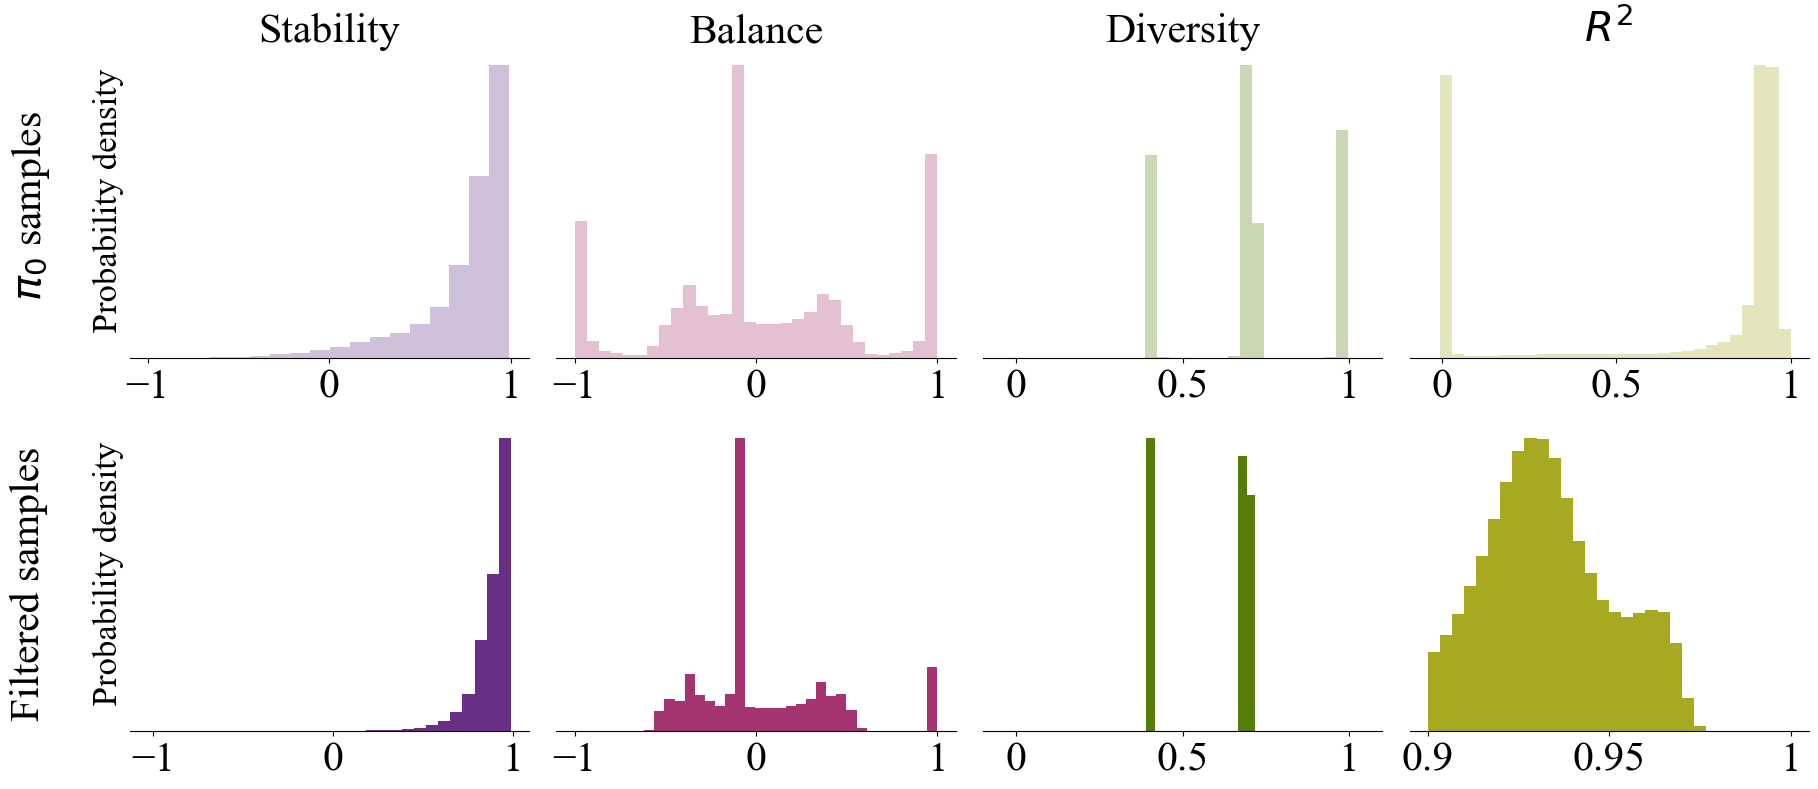

In [6]:
# R1 BD90
colors = ["#692F85", "#A3346F", "#547E08", "#A6A921" ]
metrics_labels =["Stability", "Balance", "Diversity", "$R^2$" ]
bin = 30
title_size = 30

fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (18,8))
axes = axes.flatten()

axes[0].hist(metrics_r1full[12], bins=bin, alpha=0.3, color=colors[0], density=True)
axes[4].hist(metrics_r1_filtered[12], bins=bin, color=colors[0], density=True)
axes[0].set_title(metrics_labels[0], size = title_size)
axes[0].set_xlim([-1.1,1.1])
axes[0].text(-0.3, 0.5, '$\pi_{0}$ samples ', rotation=90, va='center', size=30, transform=axes[0].transAxes)
axes[4].text(-0.3, 0.5, 'Filtered samples ', rotation=90, va='center', size=30, transform=axes[4].transAxes)




axes[1].hist(metrics_r1full[1], bins=bin, alpha=0.3, color=colors[1], density=True)
axes[5].hist(metrics_r1_filtered[1], bins=bin, color=colors[1], density=True)
axes[1].set_title(metrics_labels[1], size = title_size)
axes[1].set_xlim([-1.1,1.1])
axes[5].set_xlim([-1.1,1.1])


axes[2].hist(metrics_r1full[2], bins=bin, alpha=0.3, color=colors[2], density=True)
axes[6].hist(metrics_r1_filtered[2], bins=bin, color=colors[2], density=True)
axes[2].set_xlim([-0.1,1.1])
axes[2].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"])
axes[6].set_xlim([-0.1,1.1])
axes[6].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"])
axes[2].set_title(metrics_labels[2], size = title_size)



axes[3].hist(metrics_r1full[6], bins=bin, alpha=0.3, color=colors[3], density=True)
axes[7].hist(metrics_r1_filtered[6], bins=bin, color=colors[3], density=True)
axes[3].set_title(metrics_labels[3], size = title_size)
axes[3].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 
axes[7].set_xticks([0.9, 0.95, int(1)], ["0.9", "0.95", "1"])
axes[3].set_title(metrics_labels[3], size = title_size,  fontweight='extra bold')


axes[0].set_ylabel(" Probability density", size = 25)
axes[4].set_ylabel(" Probability density", size = 25)


for i in range(len(axes)):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

fig.savefig(f'C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r1_densities.pdf', bbox_inches='tight')

### R2

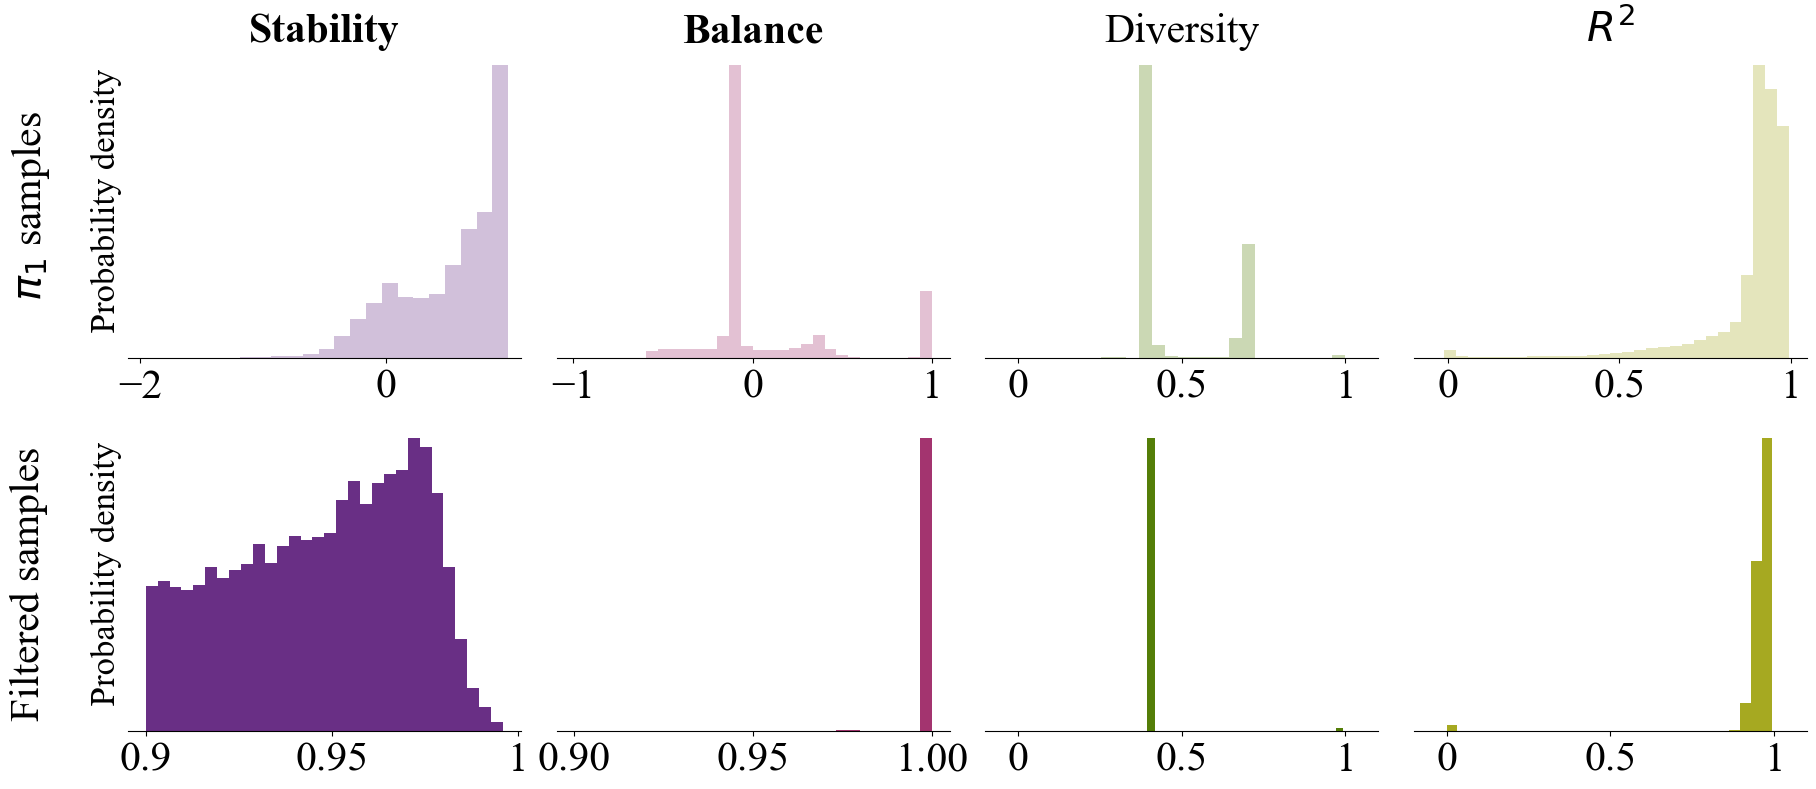

In [7]:
# R2 STB10perc

colors = ["#692F85", "#A3346F", "#547E08", "#A6A921" ]
metrics_labels =["Stability", "Balance", "Diversity", "$R^2$" ]
bin = 30
title_size = 30

fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (18,8))
axes = axes.flatten()

axes[0].hist(metrics_r2full[12], bins=bin, alpha=0.3, color=colors[0], density=True)
axes[4].hist(metrics_r2_filtered[12], bins=bin, color=colors[0], density=True)
axes[0].set_title(metrics_labels[0], size = title_size, fontweight='extra bold')
axes[0].set_xlim([-2.1,1.1])
axes[4].set_xticks([0.9, 0.95, int(1)], ["0.9", "0.95", "1"]) 
axes[0].text(-0.3, 0.5, '$\pi_{1}$ samples ', rotation=90, va='center', size=30, transform=axes[0].transAxes)
axes[4].text(-0.3, 0.5, 'Filtered samples ', rotation=90, va='center', size=30, transform=axes[4].transAxes)



axes[1].hist(metrics_r2full[1], bins=bin, alpha=0.3, color=colors[1], density=True)
axes[5].hist(metrics_r2_filtered[1], bins=bin, color=colors[1], density=True)
axes[1].set_title(metrics_labels[1], size = title_size, fontweight='extra bold')
#axes[5].set_xticks([0.9, 0.95, int(1)], ["0.9", "0.95", "1"]) 


axes[2].hist(metrics_r2full[2], bins=bin, alpha=0.3, color=colors[2], density=True)
axes[6].hist(metrics_r2_filtered[2], bins=bin, color=colors[2], density=True)
axes[2].set_title(metrics_labels[2], size = title_size)
axes[2].set_xlim([-0.1,1.1])
axes[6].set_xlim([-0.1,1.1])
axes[2].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 
axes[6].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 


axes[3].hist(metrics_r2full[6], bins=bin, alpha=0.3, color=colors[3], density=True)
axes[7].hist(metrics_r2_filtered[6], bins=bin, color=colors[3], density=True)
axes[3].set_title(metrics_labels[3], size = title_size)
axes[7].set_xlim([-0.1,1.1])
axes[3].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 
axes[7].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 



axes[0].set_ylabel(" Probability density", size = 25)
axes[4].set_ylabel(" Probability density", size = 25)


for i in range(len(axes)):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

fig.savefig(f'C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r2_densities.pdf', bbox_inches='tight')

### R3


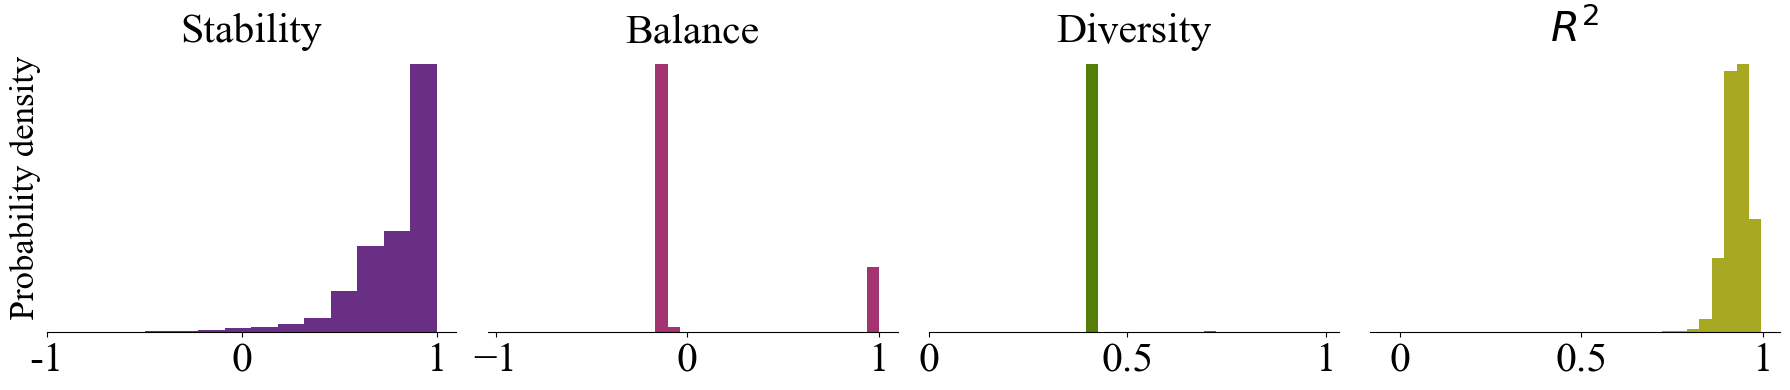

In [8]:
# R4 full
colors = ["#692F85", "#A3346F", "#547E08", "#A6A921" ]
metrics_labels =["Stability", "Balance", "Diversity", "$R^2$" ]
bin = 30
title_size = 30

fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (18,4))
axes = axes.flatten()


axes[0].hist(metrics_r3full[12], bins=bin,color=colors[0], density=True)
axes[0].set_xlim([-0.9,1.1])
axes[0].set_xticks([-1, 0, int(1)], ["-1", "0", "1"]) 

axes[1].hist(metrics_r3full[1], bins=bin, color=colors[1], density=True)
axes[2].hist(metrics_r3full[2], bins=bin,color=colors[2], density=True)
axes[2].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 

axes[3].hist(metrics_r3full[6], bins=bin, color=colors[3], density=True)
axes[3].set_xticks([0, 0.5, int(1)], ["0", "0.5", "1"]) 

axes[0].set_ylabel(" Probability density", size = 25)




for i in range(len(axes)):
    axes[i].set_title(metrics_labels[i], size = title_size)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

fig.savefig(f'C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r3_densities.pdf', bbox_inches='tight')

### Fraction of rules

In [9]:
total_rules = x_r1.shape[0]
filtered_r1 = x_r1_filtered.shape[0]
filtered_r2 = x_r2_filtered.shape[0]
filtered_r3 = x_r3_filtered.shape[0]


fract_p0 = filtered_r1/total_rules
fract_p1 = filtered_r2/total_rules
fract_p2 = filtered_r3/total_rules


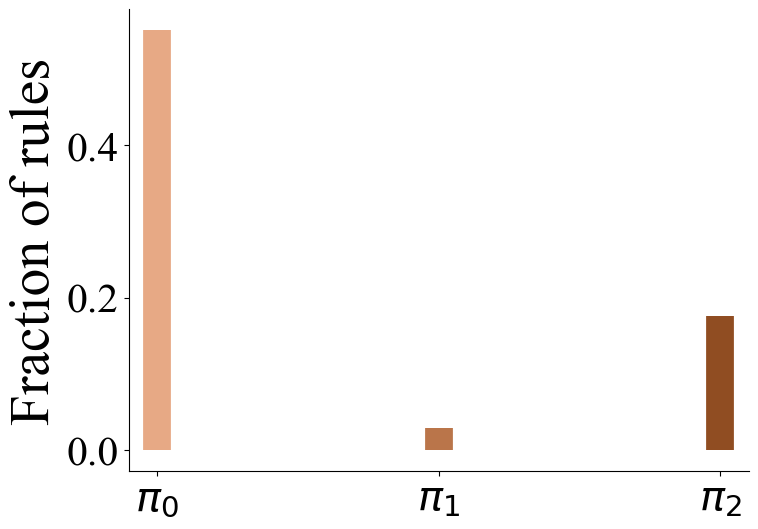

In [10]:
# Example data
categories = ['$\pi_{0}$', '$\pi_{1}$', '$\pi_{2}$']
colors = ["#E7A985", "#BA754A", "#904D22"]
values = [fract_p0, fract_p1, fract_p2]
x_positions = np.arange(len(categories))

fig, ax = plt.subplots(figsize = (8,6))

# Create a horizontal line plot
ax.vlines(categories, 0, values,  linewidth=20, color= colors)
#ax.scatter(values, y_positions, color='red')  # Optionally mark the value points
#ax.set_yticks(y_positions, categories)  # Label the categories
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim([-0.05,0.2])
ax.set_xticks(x_positions, categories)
#plt.xlabel('Fraction of rules samples')
ax.set_ylabel('Fraction of rules')

plt.show()

fig.savefig(f'C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_fraction_rules_prior.pdf', bbox_inches='tight')

## APPENDIX

### R1 Posterior and samples - Appendix

Drawing 350000 posterior samples:   0%|          | 0/350000 [00:00<?, ?it/s]

c:\Users\Miriam\anaconda3\envs\mysbi\lib\site-packages\nflows\transforms\lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:2190.)
  outputs, _ = torch.triangular_solve(


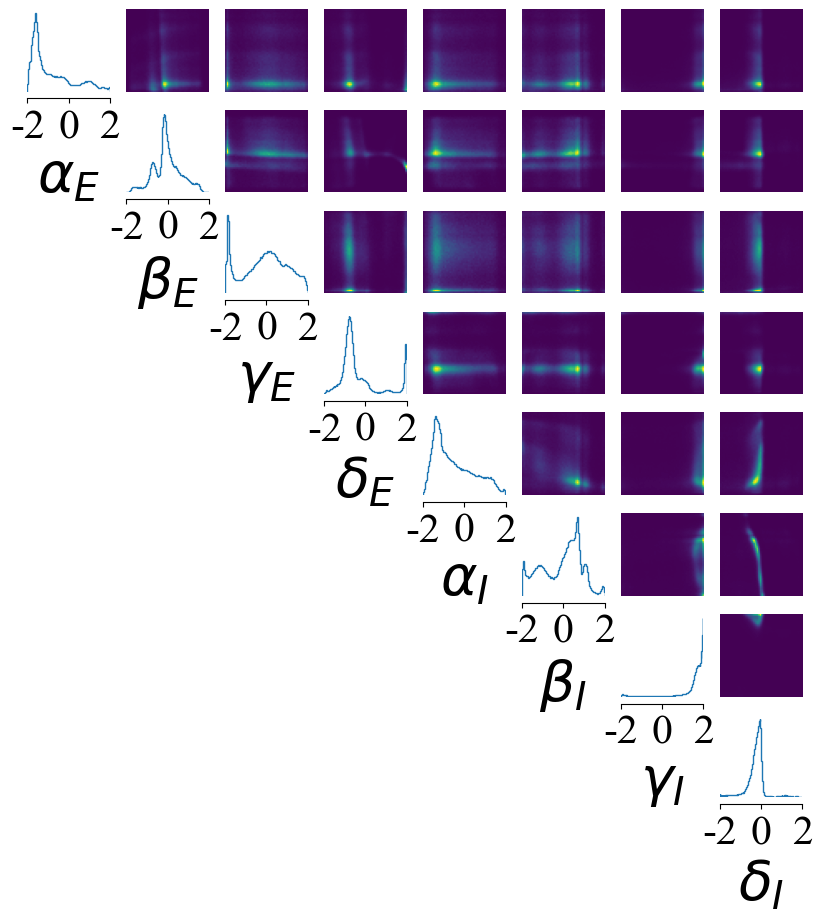

In [12]:
# Load pickle data
posterior_name_r1 = "P1_r1_posterior_complete_trainsqrt90"
with open(f"saved/results/P1/{posterior_name_r1}.pkl", "rb") as file:
    posterior_P1_r1 = pickle.load(file)

#print("Posterior round1 loaded", posterior_r1)

observation = torch.zeros(1, ) + 1

samples_P1_r1 = posterior_P1_r1.sample((350000,), x=observation)
labels = [r'$\alpha_E$', r'$\beta_E$', r'$\gamma_E$', r'$\delta_E$', 
    r'$\alpha_I$', r'$\beta_I$', r'$\gamma_I$', r'$\delta_I$']
# Plotting 
# plot posterior samples
fig, _ = analysis.pairplot(
    samples_P1_r1, limits=[[-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2]], figsize=(10, 10), labels=labels
)

fig.savefig('C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r1_posterior_complete_trainsqrt90_pairplot.pdf', bbox_inches='tight')

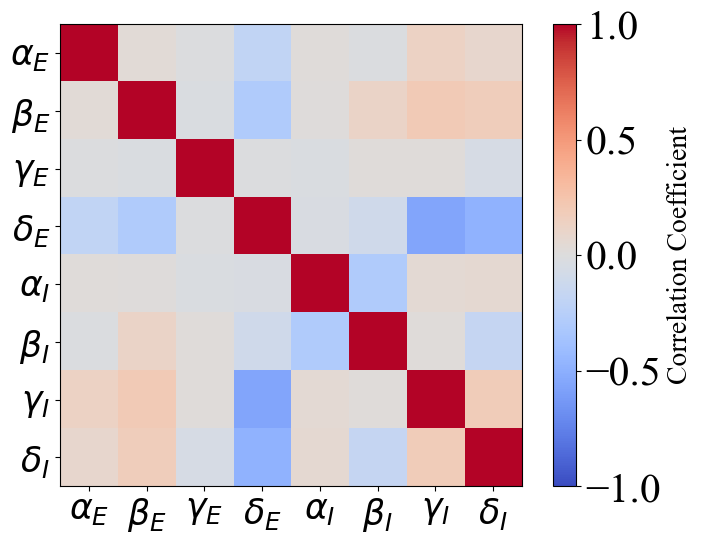

In [13]:
# Correlation matrix
matrix = torch.corrcoef(samples_P1_r1.T)
correlation_matrix_np = matrix.numpy()
labels = [r'$\alpha_E$', r'$\beta_E$', r'$\gamma_E$', r'$\delta_E$', 
          r'$\alpha_I$', r'$\beta_I$', r'$\gamma_I$', r'$\delta_I$']

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(correlation_matrix_np, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, ax=ax, label='Correlation Coefficient')
cbar.set_label('Correlation Coefficient', fontsize=20)  # Reduce the fontsize as needed
ax.set_xticks(np.arange(8))
ax.set_xticklabels(labels, size=25)
ax.set_yticks(np.arange(8))
ax.set_yticklabels(labels, size=25)
#ax.set_title(r'$p_{0}( \theta| B, C > 0.9)$', size=20, pad=20)

# Save the figure
fig.savefig('C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r1_posterior_complete_trainsqrt90_corrmatrix.pdf', bbox_inches='tight')

# Show the plot
plt.show()

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[ 0.97294915  0.14041859 -0.19806416 -1.228476   -1.3875173   0.7039841
  1.9060653  -0.46996945]
S:  0.619882710433843 B:  -0.11111111111111116 D:  0.4052915607250467
A:  0.7090569764139655 mu:  1.4924335974802343 sigma:  0.2505159360596692 r_squared:  0.9258034849208134 R0:  -0.006399716527671272


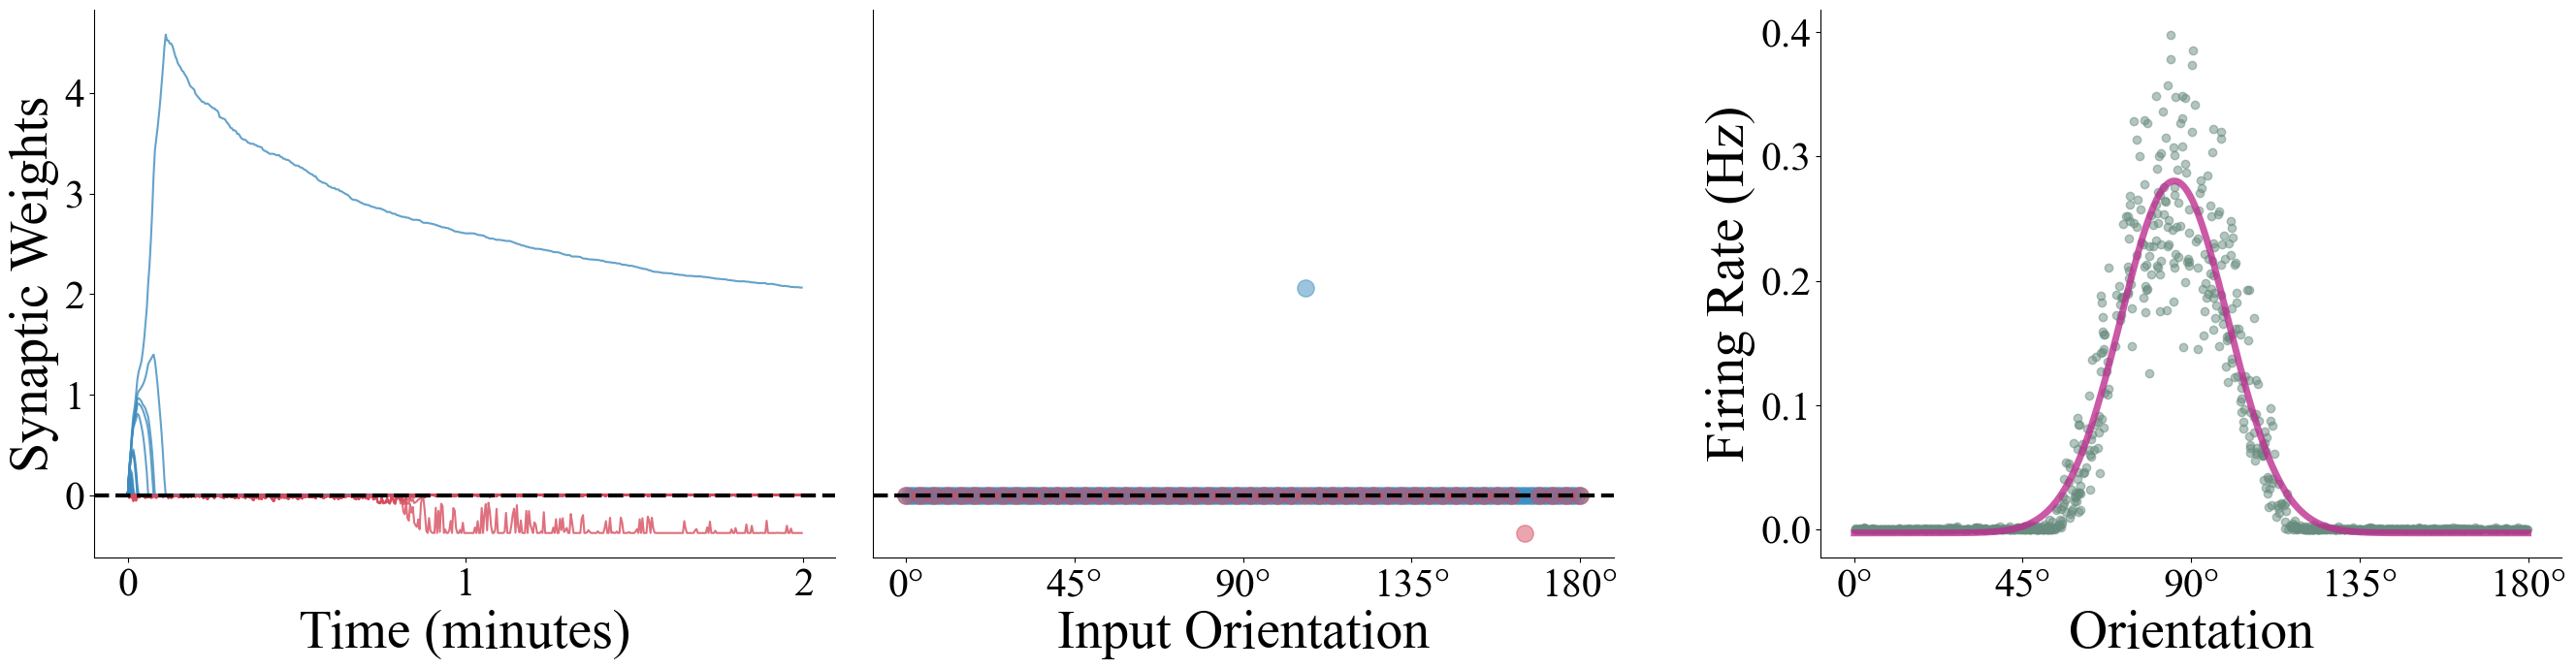

In [28]:
# observation of S = 0 and B = 0
observation = torch.zeros(1, ) + 1
#observation =  torch.zeros(1, ) + 1
samples_torch = posterior_P1_r1.sample((1,), x=observation)
samples = samples_torch.cpu().detach().numpy()[0]
print(samples)

w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0 = run_baseline_network(samples, sbi_run=False)

print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
#print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )

# Take the last half of the data - why? Because at the beginning the network is not stable
l = int(len(angle)//2)
# Network Parameters
E_inputs = 200
I_inputs = 50
Groups = 10

# Simulation Parameters
time = 100000 # ms
dt = 0.1  # ms
timesteps=int(time/dt)
pulse_time = 50

#COMPUTE THE GAUSSIAN FIT WITHOUT NORMALIZATION
A, mu, sigma, r_squared, R0 = get_tuning_stats(angle, r, pulse_time, dt, normalize_A = False)
x_fit = np.linspace(0, np.pi, 1000)
y_fit = gaussian(x_fit, A, mu, sigma, R0)

fig, ax = plt.subplots(1, 3,figsize=(25, 7), sharey=False)

# Share the y-axis between the first two subplots
ax[1].sharey(ax[0])

ax[0].plot(np.linspace(0, time, timesteps)[::2000], w_e[::2000], color = '#3d8bbeff', alpha = 0.8);
ax[0].plot(np.linspace(0, time, timesteps)[::2000], -w_i[::2000]/4, color = '#d74c5eff', alpha = 0.8);
ax[0].axhline(y = 0, linestyle = "--", linewidth = 3.0, color = 'k')
ax[0].set_xticks(np.linspace(0, time, 3), ['0', '1', '2'], size = 30)
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('Synaptic Weights')
#ax[0].set_title('Weight Trajectories')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
#ax[0].text(-0.1, 1.15, 'a)', transform=ax[0].transAxes, fontsize=30, verticalalignment='top')



ax[1].plot(np.linspace(0, 100, 200), w_e[-1], '.', markersize = 25, color = '#3d8bbeff', alpha = 0.5)
ax[1].plot(np.linspace(0, 100, 50), -w_i[-1]/4, '.', markersize = 25, color = '#d74c5eff', alpha = 0.5)
ax[1].axhline(y = 0, linestyle = "--", linewidth = 3.0, color = 'k')
ax[1].set_xlabel('Input Orientation')
xticks = np.linspace(0, 100, 5)
orientation = np.linspace(0, np.pi, 5)
xtick_labels = [f"{int(x * (180/np.pi))}°" for x in orientation]
ax[1].set_xticks(xticks, xtick_labels, size = 30)
#plt.xticks(np.linspace(0, 100, 4), ['0', r'$\pi/4$', r'$3\pi/4$', r'$\pi$'])
#ax[1].set_ylabel('Weights')
#ax[1].set_title('Learned Weights')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].tick_params(left=False, labelleft=False)  # Hide y-ticks and y-tick labels in the second plot

#ax[1].text(-0.1, 1.15, 'b)', transform=ax[1].transAxes, fontsize=30, verticalalignment='top')
#ax[1].text(0.5, 1.07, f'S: {np.round(S, 3)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top')
#ax[1].text(0.5, 1, f'B: {np.round(B, 3)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top')
#ax[1].text(0.5, 0.93, f'D: {np.round(D, 3)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top')

ax[2].plot(angle[-l:], np.mean(r.reshape(-1, int(pulse_time/dt)), axis=1)[-l:],
         'o',
         color = '#688c7eca', alpha = 0.5,label = 'Firing Rate')
        
ax[2].plot(x_fit, y_fit, '-', label='Gaussian', color = '#bc2d8fca', linewidth = 5)
# Set x-ticks with degree sign and integer values
xticks = np.linspace(0, np.pi, 5)
xtick_labels = [f"{int(x * (180/np.pi))}°" for x in xticks]
ax[2].set_xticks(xticks, xtick_labels, size = 30)
ax[2].set_xlabel('Orientation')
ax[2].set_ylabel('Firing Rate (Hz)')
#ax[2].set_title('Neuron Tuning Curve')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

  # Reduce horizontal spacing between plots

#ax[2].text(-0.13, 1.15, 'c)', transform=ax[2].transAxes, fontsize=30, verticalalignment='top')

#ax[2].legend(frameon = False, fontsize = 20, bbox_to_anchor=(1, 1), handlelength = 1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

# Specifically increase the spacing between the second and third plots
ax[2].set_position([ax[2].get_position().x0 + 0.07,  # Shift third plot slightly right
                    ax[2].get_position().y0,
                    ax[2].get_position().width,
                    ax[2].get_position().height])

plt.show()
fig.savefig(f'C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r1_sample_example.pdf', bbox_inches='tight')

### R2 Posterior and samples - Appendix

Drawing 350000 posterior samples:   0%|          | 0/350000 [00:00<?, ?it/s]

c:\Users\Miriam\anaconda3\envs\mysbi\lib\site-packages\nflows\transforms\lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:2190.)
  outputs, _ = torch.triangular_solve(


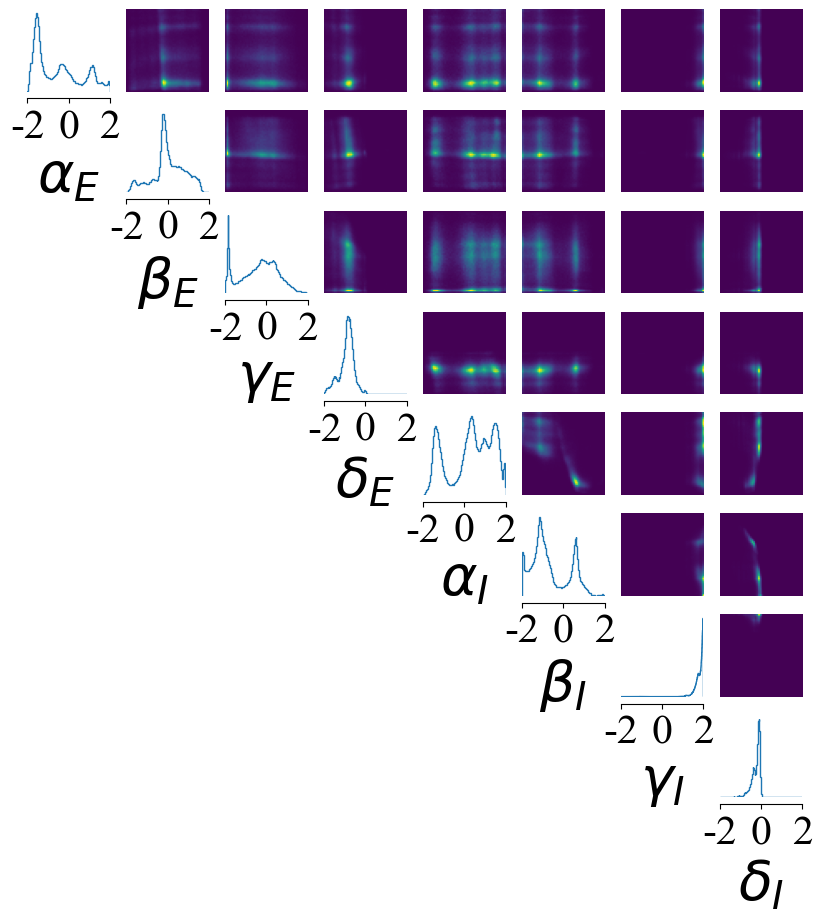

In [11]:
# Load pickle data
posterior_name_r2 = "P1_r2_posterior_trainsqrt90_popsb90"
with open(f"saved/results/P1/{posterior_name_r2}.pkl", "rb") as file:
    posterior_P1_r2 = pickle.load(file)

#print("Posterior round1 loaded", posterior_r1)
# Observation S = 1
observation = torch.zeros(2, ) + 1

samples_P1_r2 = posterior_P1_r2.sample((350000,), x=observation)
labels = [r'$\alpha_E$', r'$\beta_E$', r'$\gamma_E$', r'$\delta_E$', 
    r'$\alpha_I$', r'$\beta_I$', r'$\gamma_I$', r'$\delta_I$']
# Plotting 
# plot posterior samples
fig, _ = analysis.pairplot(
    samples_P1_r2, limits=[[-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2], [-2,2]], figsize=(10, 10), labels=labels
)

fig.savefig('C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r2_posterior_trainsqrt90_popsb90_pairplot.pdf', bbox_inches='tight')

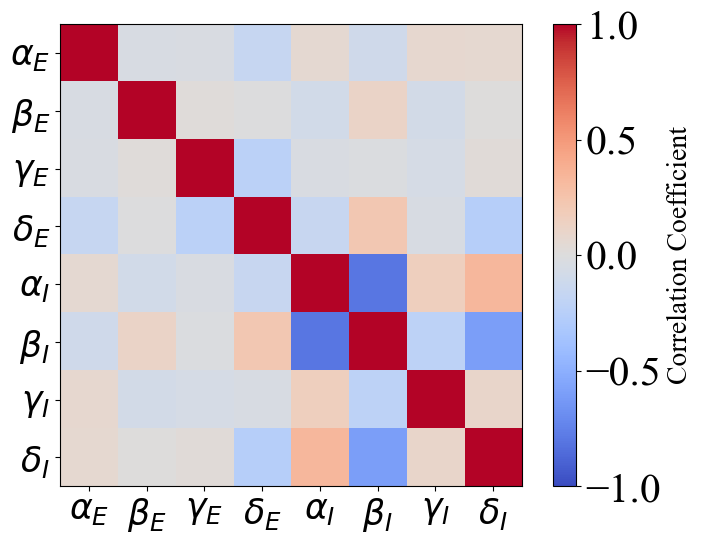

In [47]:
# Correlation matrix
matrix = torch.corrcoef(samples_P1_r2.T)
correlation_matrix_np = matrix.numpy()
labels = [r'$\alpha_E$', r'$\beta_E$', r'$\gamma_E$', r'$\delta_E$', 
          r'$\alpha_I$', r'$\beta_I$', r'$\gamma_I$', r'$\delta_I$']

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(correlation_matrix_np, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, ax=ax, label='Correlation Coefficient')
cbar.set_label('Correlation Coefficient', fontsize=20)  # Reduce the fontsize as needed
ax.set_xticks(np.arange(8))
ax.set_xticklabels(labels, size=25)
ax.set_yticks(np.arange(8))
ax.set_yticklabels(labels, size=25)
#ax.set_title(r'$p_{0}( \theta| B, C > 0.9)$', size=20, pad=20)

# Save the figure
fig.savefig('C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r2_posterior_trainsqrt90_popsb90_corrmatrix.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [23]:
# observation of S = 0 and B = 0
observation = torch.zeros(2, ) + 1
#observation =  torch.zeros(1, ) + 1
samples_torch = posterior_P1_r2.sample((1,), x=observation)
samples = samples_torch.cpu().detach().numpy()[0]
print(samples)

w_e, w_i, r, E_target, E_rates, I_rates, angle, S, B, D,  A, mu, sigma, r_squared, R0 = run_baseline_network(samples, sbi_run=False)

print("S: ", S, "B: ", B, "D: ", D)
#print("S:",S, "mean_B:", mean_B, "mean_ D:", mean_D)
print("A: ", A, "mu: ", mu, "sigma: ", sigma, "r_squared: ", r_squared, "R0: ", R0)
#print("LD_e: ", LD_e, "LD_i: ", LD_i,"mean_B", mean_B, "mean_ D", mean_D )

# Take the last half of the data - why? Because at the beginning the network is not stable
l = int(len(angle)//2)
# Network Parameters
E_inputs = 200
I_inputs = 50
Groups = 10

# Simulation Parameters
time = 100000 # ms
dt = 0.1  # ms
timesteps=int(time/dt)
pulse_time = 50

#COMPUTE THE GAUSSIAN FIT WITHOUT NORMALIZATION
A, mu, sigma, r_squared, R0 = get_tuning_stats(angle, r, pulse_time, dt, normalize_A = False)
x_fit = np.linspace(0, np.pi, 1000)
y_fit = gaussian(x_fit, A, mu, sigma, R0)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[-1.3258984   0.23204242  0.60253507 -0.95110196 -1.1146803   0.5614204
  1.8418574  -0.5083495 ]
S:  0.7887398663311088 B:  -0.11111111111111109 D:  0.4052915607250467
A:  0.743271602689502 mu:  0.13695312054309766 sigma:  0.243434162555061 r_squared:  0.9364966962345274 R0:  -0.0032641105305470973


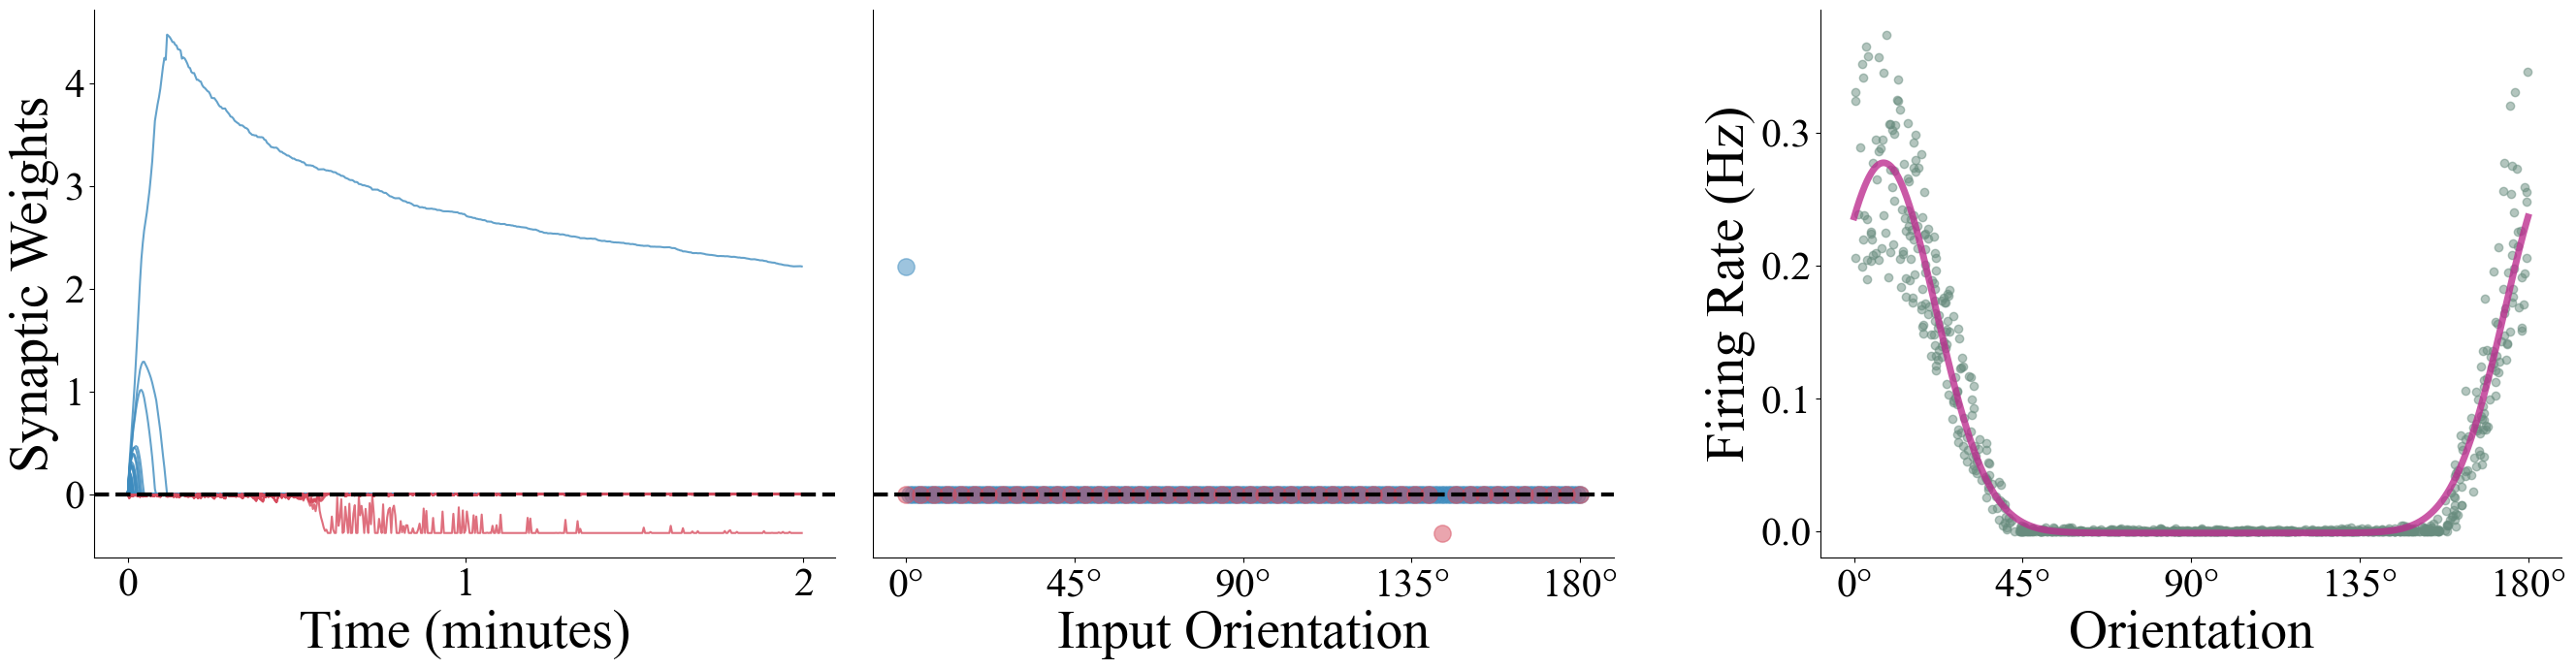

In [24]:
fig, ax = plt.subplots(1, 3,figsize=(25, 7), sharey=False)

# Share the y-axis between the first two subplots
ax[1].sharey(ax[0])

ax[0].plot(np.linspace(0, time, timesteps)[::2000], w_e[::2000], color = '#3d8bbeff', alpha = 0.8);
ax[0].plot(np.linspace(0, time, timesteps)[::2000], -w_i[::2000]/4, color = '#d74c5eff', alpha = 0.8);
ax[0].axhline(y = 0, linestyle = "--", linewidth = 3.0, color = 'k')
ax[0].set_xticks(np.linspace(0, time, 3), ['0', '1', '2'], size = 30)
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('Synaptic Weights')
#ax[0].set_title('Weight Trajectories')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
#ax[0].text(-0.1, 1.15, 'a)', transform=ax[0].transAxes, fontsize=30, verticalalignment='top')



ax[1].plot(np.linspace(0, 100, 200), w_e[-1], '.', markersize = 25, color = '#3d8bbeff', alpha = 0.5)
ax[1].plot(np.linspace(0, 100, 50), -w_i[-1]/4, '.', markersize = 25, color = '#d74c5eff', alpha = 0.5)
ax[1].axhline(y = 0, linestyle = "--", linewidth = 3.0, color = 'k')
ax[1].set_xlabel('Input Orientation')
xticks = np.linspace(0, 100, 5)
orientation = np.linspace(0, np.pi, 5)
xtick_labels = [f"{int(x * (180/np.pi))}°" for x in orientation]
ax[1].set_xticks(xticks, xtick_labels, size = 30)
#plt.xticks(np.linspace(0, 100, 4), ['0', r'$\pi/4$', r'$3\pi/4$', r'$\pi$'])
#ax[1].set_ylabel('Weights')
#ax[1].set_title('Learned Weights')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].tick_params(left=False, labelleft=False)  # Hide y-ticks and y-tick labels in the second plot

#ax[1].text(-0.1, 1.15, 'b)', transform=ax[1].transAxes, fontsize=30, verticalalignment='top')
#ax[1].text(0.5, 1.07, f'S: {np.round(S, 3)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top')
#ax[1].text(0.5, 1, f'B: {np.round(B, 3)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top')
#ax[1].text(0.5, 0.93, f'D: {np.round(D, 3)}', transform=ax[1].transAxes, fontsize=20, verticalalignment='top')

ax[2].plot(angle[-l:], np.mean(r.reshape(-1, int(pulse_time/dt)), axis=1)[-l:],
         'o',
         color = '#688c7eca', alpha = 0.5,label = 'Firing Rate')
        
ax[2].plot(x_fit, y_fit, '-', label='Gaussian', color = '#bc2d8fca', linewidth = 5)
# Set x-ticks with degree sign and integer values
xticks = np.linspace(0, np.pi, 5)
xtick_labels = [f"{int(x * (180/np.pi))}°" for x in xticks]
ax[2].set_xticks(xticks, xtick_labels, size = 30)
ax[2].set_xlabel('Orientation')
ax[2].set_ylabel('Firing Rate (Hz)')
#ax[2].set_title('Neuron Tuning Curve')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

  # Reduce horizontal spacing between plots

#ax[2].text(-0.13, 1.15, 'c)', transform=ax[2].transAxes, fontsize=30, verticalalignment='top')

#ax[2].legend(frameon = False, fontsize = 20, bbox_to_anchor=(1, 1), handlelength = 1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

# Specifically increase the spacing between the second and third plots
ax[2].set_position([ax[2].get_position().x0 + 0.07,  # Shift third plot slightly right
                    ax[2].get_position().y0,
                    ax[2].get_position().width,
                    ax[2].get_position().height])

plt.show()
#fig.savefig(f'C:/Users/Miriam/OneDrive/Documentos/NIP/Thesis/Images/P1_r2_bothWTA2.pdf', bbox_inches='tight')